# start

In [ ]:
pip install qutip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 20.5 MB/s eta 0:00:00


In [ ]:
! sudo apt-get install texlive-latex-recommended
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
! sudo apt install cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libkpathsea6 libptexenc1 libsynctex2 libteckit0 libtexlua53 libtexluajit2
  libwoff1 libzzip-0-13 lmodern poppler-data t1utils tex-common texlive-base
  texlive-binaries texlive-latex-base xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  poppler-utils ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum debhelper gv | postscript-viewer perl-tk xpdf
  | pdf-viewer xzdec texlive-latex-base-doc texlive-latex-recommended-doc
  texlive-luatex texlive-pstricks
The following NEW packages will be installed:
  dvisvgm fonts-droid-fa

In [ ]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display
from base64 import b64encode
from qutip import basis, coherent, destroy, expect, isket, ket2dm, mesolve, num, variance, wigner
from IPython.display import HTML
from matplotlib import animation
from matplotlib.animation import PillowWriter
from scipy import integrate


from matplotlib import rc
rc('text', usetex=True)
rc('xtick', labelsize=40)
rc('ytick', labelsize=40)
rc ('axes', labelsize=40)
rc('legend', fontsize=40)
rc('font', family='serif')
# Logarithmic Negativity Function
def log_negativity(rho,r):
  ng=[]
  for i in range (r):
    density_matrix = partial_transpose(rho[i],[1,0])
    eigenvalues , vect =density_matrix.eigenstates()
    absolute_eigenvalues = np.abs(eigenvalues)
    norm = np.sum(absolute_eigenvalues)
    ng.append(np.log2(norm))
  return ng

# Cat Size Function
def cat_size(result,alpha):
  rst=result.states
  x2=[]
  for u in range(r):
    sd=ptrace(rst[u],1)
    x21=(expect(( (create(N)-destroy(N)) *1j),sd ) )
    x2.append(x21**2)
  if alpha == 3:
    lbl=  '$\\alpha_G = 10 ^{-3}$'
  elif alpha == 4:
    lbl=  '$\\alpha_G = 10 ^{-4}$'
  elif alpha == 5:
    lbl=  '$\\alpha_G = 10 ^{-5}$'
  plt.plot(10**6*t,x2,label=lbl)


# Fidelity Function
def my_fidelity(result,r,alpha):
    psi=[]
    fid=[]

    #generating ideal cat states
    for i in range(r):
      beta=-1j*grp*t[i]
      ab=tensor(basis(M,0),basis(N,0))
      ba=tensor(basis(M,1),coherent(N,beta))
      psi.append((ab + ba).unit() )
      res=result.states[i]
      fid.append(fidelity(ket2dm(psi[i]),res.unit()))
    plt.plot(10**6*t,fid,label = graph_label(alpha))

#Wigner Function
def wigner1(psi,am,alph,tm):
    xvec = np.linspace(-2.2, 2.2, 200)
    pvec = np.linspace(-am*np.sqrt(2), 2.6, 200)
    W = wigner(psi,xvec,pvec)
    x_rescaled = xvec / np.sqrt(2)
    y_rescaled = pvec / np.sqrt(2)
    plt.figure(figsize=(15, (np.floor(am/2))+8))
    plt.contourf(x_rescaled, y_rescaled, W, 100, cmap='seismic')
    plt.xlabel('$Im(\\alpha)$')
    plt.ylabel('$Re(\\alpha)$')
    wig_label=w_label(alph,tm)
    plt.title(wig_label,fontsize=45)
    plt.colorbar(label='W($\\alpha$)')
    plt.grid(True)
    sav(alph,tm)
    plt.show()

#Wigner saving
def sav(alph,tm):
  if tm==0:
    if alph==2:
     plt.savefig('Ideal_25.pdf',format='pdf',dpi=2000)
    elif alph==3:
     plt.savefig('10-3_25.pdf',format='pdf',dpi=2000)
    elif alph==4:
     plt.savefig('10-4_25.pdf',format='pdf',dpi=2000)
    elif alph==5:
     plt.savefig('10-5_25.pdf',format='pdf',dpi=2000)

  elif tm==1:
    if alph==2:
     plt.savefig('Ideal_12.pdf',format='pdf',dpi=2000)
    if alph==3:
     plt.savefig('10-3_12.pdf',format='pdf',dpi=2000)
    if alph==4:
     plt.savefig('10-4_12.pdf',format='pdf',dpi=2000)
    if alph==5:
     plt.savefig('10-5_12.pdf',format='pdf',dpi=2000)


#Wigner Labelling
def w_label(alph,tm):
  if alph==2:
    s1='No Dissipation'
  elif alph==3:
    s1='$\\alpha_G=10^{-3}$'
  elif alph==4:
    s1='$\\alpha_G=10^{-4}$'
  elif alph==5:
    s1='$\\alpha_G=10^{-5}$'
  if tm==0:
    s2='$t=2.5 \\mu s$'
  elif tm==1:
    s2='$t=1.2 \\mu s$'
  return s1+' , '+s2
#General Labeling
def graph_label(alph):
  if alph==3:
    return '$\\alpha_G=10^{-3}$'
  elif alph==4:
    return '$\\alpha_G=10^{-4}$'
  elif alph==5:
    return '$\\alpha_G=10^{-5}$'

#Projective Measurement
def measure(rslt,r):
    si=rslt
    bs=tensor(ket2dm(basis(2,1)+basis(2,0)),qeye(N))
    bas=bs.dag()*si
    return bas

In [ ]:
e=1.602*10**-19
uo = 4*np.pi* 10**-7
h  = 6.62607* 10**-34
h_cut = h/(2*np.pi)
Ns = 2.4* 10**12
phi=np.pi/10
R = 3 * 10**-6
d_min = np.sqrt(2)*R
Ej = 50 * 10**9 * h
Ec = 200 * 10**6 * h
me = 9.1* 10**-31
g = 2
ub = e * h_cut/(2*me)
ro = g* ub/h_cut
uzpf = h_cut * ro * np.sqrt(Ns/2)
phi_o = h / (2*e)
wp = np.sqrt(8 * Ej * Ec)/h_cut

grp = uo * uzpf * phi * wp/(16 * phi_o * d_min)
grp_corrected = grp*(1-0.5*np.sqrt(2*Ec/Ej))

wm = 2*np.pi*500*10**6
wac= 2*np.pi*500*10**6
#B_ani=2.5*10**-3
#wm=ro*B_ani
Temp = 5* 10**-3
kb = 1.380649 * 10**-23
f = np.exp(h_cut*wm/(kb*Temp))
nth = 1/(f-1)
T1=20*10**-6
T2=T1

# Wigner Plots

In [ ]:
#Wigner Plots
M=2
N = 140
m = tensor(qeye(M),destroy(N))
c = tensor(destroy(M),qeye(N))
# Initial State
psi = tensor(np.sqrt(0.5)*(basis(M,0)+basis(M,1)),basis(N,0))
Time=2.5* 10**-6
r=100
t=np.linspace(0,Time,r)
H=(np.sqrt(8*Ec*Ej)-Ec)*c.dag()*c -0.5*Ec*c.dag()*c.dag()*c*c + grp*c.dag()*c*(m.dag()+m)
z1=[]
z2=[]
result=mesolve(H,ket2dm(psi),t,[],[])
z1.append(result.states[-1])
z2.append(result.states[-53])
for Alpha in [3,4,5]:
  aw = wm*10**-Alpha
  c1 = np.sqrt(aw*nth)
  c2 = np.sqrt(aw*(nth+1))
  c3 = np.sqrt(1/T1)
  c4 = np.sqrt(1/T2)
  d=[ c1 * m.dag(), c2 * m,  c3 * c,  c4 * c.dag()* c ]
  result=mesolve(H,ket2dm(psi),t,d,[])
  z1.append(result.states[-1])
  z2.append(result.states[-53])
for j in [0,1,2,3]:

  sd=z1[j]
  out=measure(sd,r)
  wigner1(ptrace(out,1),10,j+2,0)
  sd=z2[j]
  out=measure(sd,r)
  wigner1(ptrace(out,1),6,j+2,1)


KeyboardInterrupt: 

# Logrithmic Negativity

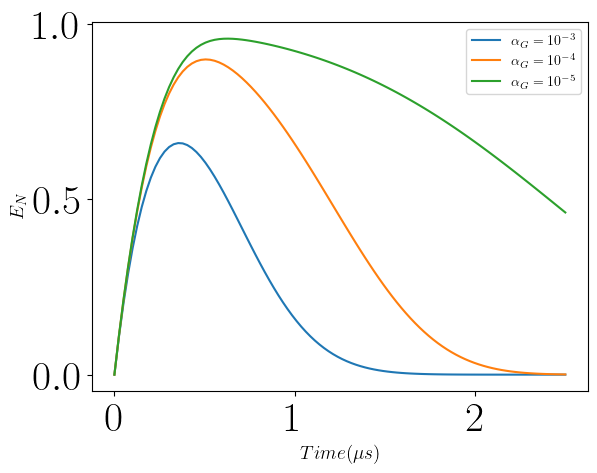

In [ ]:
M=2
N = 140
m = tensor(qeye(M),destroy(N))
c = tensor(destroy(M),qeye(N))

# Initial State
psi = tensor(np.sqrt(0.5)*(basis(M,0)+basis(M,1)),basis(N,0))
Time=2.5* 10**-6
r=100
t=np.linspace(0,Time,r)
H=(np.sqrt(8*Ec*Ej)-Ec)*c.dag()*c -0.5*Ec*c.dag()*c.dag()*c*c + 0* m.dag()*m + grp*c.dag()*c*(m.dag()+m)
#plt.figure(figsize=(5.5,6))
for Alpha in [3,4,5]:
  aw = wm*10**-Alpha
  c1 = np.sqrt(aw*nth)
  c2 = np.sqrt(aw*(nth+1))
  c3 = np.sqrt(1/T1)
  c4 = np.sqrt(1/T2)
  d=[ c1 * m.dag(), c2 * m,  c3 * c,  c4 * c.dag()* c ]
  result=mesolve(H,psi,t,d,[])
  logarithmic_negativity=log_negativity(result.states,r)
  plt.plot(10**6*t,logarithmic_negativity,label=graph_label(Alpha))
font1 = {'family':'serif','color':'grey','size':20}
font2 = {'family':'serif','color':'black','size':14}

#plt.rcParams["font.family"] = "serif"
#plt.rcParams["mathtext.fontset"] = "dejavuserif"

#plt.xlabel(r"$Time(\\mus)$")
#plt.ylabel(r"$E_N$")
#plt.tight_layout()

plt.xlabel(" $Time( \mu s)$",fontdict=font2)
plt.ylabel("$E_N$",fontdict=font2)
plt.legend()
plt.savefig('En_vs_T.pdf',format='pdf',dpi=2000)
plt.show()


# Cat Size

In [ ]:
M=2
N = 140
m = tensor(qeye(M),destroy(N))
c = tensor(destroy(M),qeye(N))

# Initial State
psi = tensor(np.sqrt(0.5)*(basis(M,0)+basis(M,1)),basis(N,0))
Time=2.45* 10**-6
mz=['o','>','v','s','x']
r=100
t=np.linspace(0,Time,r)
H=(np.sqrt(8*Ec*Ej)-Ec)*c.dag()*c -0.5*Ec*c.dag()*c.dag()*c*c + 0* m.dag()*m + 1*grp*c.dag()*c*(m.dag()+m)
#Collapse Operators and Master Equation
# plt.figure(figsize=(5.5,6))
for Alpha in [5,4,3]:
  aw = wm*10**-Alpha
  c1 = np.sqrt(aw*nth)
  c2 = np.sqrt(aw*(nth+1))
  c3 = np.sqrt(1/T1)
  c4 = np.sqrt(1/T2)
  d=[ c1 * m.dag(), c2 * m,  c3 * c,  c4 * c.dag()* c ]
  result=mesolve(H,psi,t,d,[])
  cat_size(result,Alpha)
plt.plot(10**6*t,(grp*t)**2, linestyle='--', label='Ideal')
font1 = {'family':'serif','color':'grey','size':20}
font2 = {'family':'serif','color':'black','size':14}
#plt.ylim(-20,20)
plt.xlabel("$ Time(\mu s)}$",fontdict=font2)
plt.ylabel("$Cat$ $Size$",fontdict=font2)
#plt.title("$g_{rp}$ vs $\Phi$",fontdict=font1)
plt.legend()
plt.savefig('Cat size.pdf',format='pdf',dpi=2000)
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


RuntimeError: latex was not able to process the following string:
b'$ Time(\\\\mu s)}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpx4mlz7h5 21814e85ca306bfdcd7d44e40ef65db3.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./21814e85ca306bfdcd7d44e40ef65db3.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 21814e85ca306bfdcd7d44e40ef65db3.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Extra }, or forgotten $.
l.29 {\sffamily $ Time(\mu s)}
                              $}%
No pages of output.
Transcript written on tmpx4mlz7h5/21814e85ca306bfdcd7d44e40ef65db3.log.




Error in callback <function _draw_all_if_interactive at 0x788aadfa7d90> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'$ Time(\\\\mu s)}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpyi9wn42s 21814e85ca306bfdcd7d44e40ef65db3.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./21814e85ca306bfdcd7d44e40ef65db3.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 21814e85ca306bfdcd7d44e40ef65db3.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Extra }, or forgotten $.
l.29 {\sffamily $ Time(\mu s)}
                              $}%
No pages of output.
Transcript written on tmpyi9wn42s/21814e85ca306bfdcd7d44e40ef65db3.log.




RuntimeError: latex was not able to process the following string:
b'$ Time(\\\\mu s)}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmprwuu08c_ 21814e85ca306bfdcd7d44e40ef65db3.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./21814e85ca306bfdcd7d44e40ef65db3.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 21814e85ca306bfdcd7d44e40ef65db3.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Extra }, or forgotten $.
l.29 {\sffamily $ Time(\mu s)}
                              $}%
No pages of output.
Transcript written on tmprwuu08c_/21814e85ca306bfdcd7d44e40ef65db3.log.




<Figure size 640x480 with 1 Axes>

# Fidelity Calculation

In [ ]:
M=2
N = 140
m = tensor(qeye(M),destroy(N))
c = tensor(destroy(M),qeye(N))

psi = tensor(np.sqrt(0.5)*(basis(M,0)+basis(M,1)),basis(N,0))
Time=2.6* 10**-6
r=100
t=np.linspace(0,Time,r)
H=(np.sqrt(8*Ec*Ej)-Ec)*c.dag()*c -0.5*Ec*c.dag()*c.dag()*c*c + 0* m.dag()*m + grp*c.dag()*c*(m.dag()+m)
#plt.figure(figsize=(5.5,6))
for Alpha in [3,4,5]:
  aw = wm*10**-Alpha
  c1 = np.sqrt(aw*nth)
  c2 = np.sqrt(aw*(nth+1))
  c3 = np.sqrt(1/T1)
  c4 = np.sqrt(1/T2)
  d=[ c1 * m.dag(), c2 * m,  c3 * c,  c4 * c.dag()* c ]
  res=mesolve(H,psi,t,d,[])
  my_fidelity(res,r,Alpha)

font1 = {'family':'serif','color':'grey','size':20}
font2 = {'family':'serif','color':'black','size':14}
plt.xlabel("$ Time(\mu s)}$",fontdict=font2)
plt.ylabel("$Fidelity$",fontdict=font2)
plt.legend()
plt.savefig('Fid_vs_T.pdf',format='pdf',dpi=2000)
plt.show()

## Fedality Function

In [ ]:

  # Fidelity
def my_fidelity(result,r,alpha):
    psi=[]
    fid=[]

    #generating ideal cat states
    for i in range(r):
      beta=-1j*grp*t[i]
      ab=tensor(basis(M,0),basis(N,0))
      ba=tensor(basis(M,1),coherent(N,beta))
      psi.append((ab + ba).unit() )
      res=result.states[i]
      fid.append(fidelity(ket2dm(psi[i]),res.unit()))
    #plot graph
    if alpha == 3:
        lbl=  '$\\alpha_G = 10 ^{-3}$'
    elif alpha == 4:
        lbl=  '$\\alpha_G = 10 ^{-4}$'
    elif alpha == 5:
        lbl=  '$\\alpha_G = 10 ^{-5}$'
    plt.plot(10**6*t,fid,label = lbl)


# Plot of grp and J

In [ ]:
e=1.602*10**-19
uo = 4*np.pi* 10**-7
h  = 6.62607* 10**-34
h_cut = h/(2*np.pi)
#h_cut=1
#h=2*np.pi*h_cut
Ns = 2.4* 10**12
phi=np.pi/10
R = 3 * 10**-6
d_min = np.sqrt(2)*R
Ej = 50 * 10**9 * h
Ec = 200 * 10**6 * h
me = 9.1* 10**-31
g = 2
ub = e * h_cut/(2*me)
ro = g* ub/h_cut
uzpf = h_cut * ro * np.sqrt(Ns/2)
phi_o = h / (2*e)
wp = np.sqrt(8 * Ej * Ec)/h_cut

num_lines = 5
line_colors = ['blue', 'green', 'red', 'purple', 'orange']
i=0

phib=np.linspace(0*np.pi,1*np.pi,1000)
#plt.figure(figsize=(7, 6))
for aj in [0.01,0.1,0.3,0.6,0.9]:
  grp_const = uo * uzpf * wp * (1-aj*aj)/(16 * phi_o * d_min)
  S = np.sqrt( np.cos(phib)*np.cos(phib) + aj*aj * np.sin(phib) * np.sin(phib))
  #grp_const=1
  grp = grp_const * np.sin(2*phib) / S**(3/2)
  grp_corrected = grp*(1-0.5*np.sqrt(2*Ec/(Ej*S)))
  x=phib/np.pi
  y=grp/(2*np.pi*10**6)
  z=grp_corrected/(2*np.pi*10**6)
  w=10**-9*(np.sqrt(8*Ec*Ej*S)-Ec)/h
  #plt.plot(x,w,linestyle='-',color=line_colors[i],linewidth='1',label='$a_j=$'+str(aj))
  #plt.plot(x,y,linestyle='--',color=line_colors[i],linewidth='0.6')
  plt.plot(x,w,linestyle='-', color=line_colors[i],linewidth='0.8',label='$a_J=$'+str(aj))
  #plt.plot(phib/np.pi,grp_corrected/(2*np.pi*10**6))
  i+=1
plt.legend()


font1 = {'family':'serif','color':'grey','size':20}
font2 = {'family':'serif','color':'black','size':15}
plt.xlim(-0.01,1.01)
plt.xlabel("$ \Phi_b/\phi_o}$",fontdict=font2)
plt.ylabel("$\omega_q$ / $2\pi$ $(GHz)$",fontdict=font2)
#plt.title("$g_{rp}$ vs $\Phi$",fontdict=font1)
plt.savefig('wq_vs_phi.pdf',format='pdf',dpi=2000)
plt.show()

In [ ]:



phib=np.linspace(0, np.pi,1000)

line_colors = ['blue', 'green', 'red', 'purple', 'orange']
i=0
#plt.figure(figsize=(6, 6))
for aj in [0.01,0.1,0.3,0.6,0.9]:
  J_const = uo * uzpf * (2*Ec*(Ej**3))**(1/4) * aj / (4 * phi_o * d_min * h_cut)
  S = np.sqrt( np.cos(phib)*np.cos(phib) + aj*aj * np.sin(phib) * np.sin(phib))

  J = J_const / S**(5/4)
  J_corrected=J*(1-0.5*np.sqrt(2*Ec/(Ej*S)))
  x=phib/np.pi
  y=J/(2*np.pi*10**6)
  z=J_corrected/(2*np.pi*10**6)
  #plt.plot(x,y,linestyle='--',color=line_colors[i],linewidth='0.7')
  plt.plot(x,z,linestyle='-' ,color=line_colors[i],linewidth='1',label='$a_J=$'+str(aj))
  i+=1
plt.legend()


font1 = {'family':'serif','color':'grey','size':20}
font2 = {'family':'serif','color':'black','size':14}
plt.xlim(-0.01,1.01)
plt.xlabel("$ \Phi_b/\phi_o}$",fontdict=font2)
plt.ylabel("$J$ /$2\pi$ $(MHz)$",fontdict=font2)
#plt.title("$J$ vs $\Phi$",fontdict=font1)
plt.savefig('J_vs_phi.pdf',format='pdf',dpi=2000)
plt.show()


# Misc

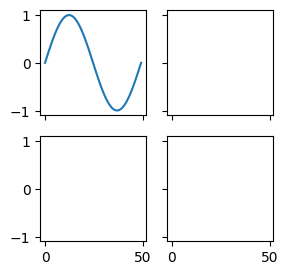

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(3, 3), sharey = True, sharex=True)
axes[0, 0].plot(np.sin(np.linspace(0, 2*np.pi, 50)))